# <center> <span style="color: #8A0A0A">**_Compte Rendu TP2 : Segmentation_**</span></center>

### <center> <span style="color: #413C02">_préparer par : Hajer Mhimdi 3DNI2_ </span></center>

# <span style="color: #110C9F">I. Clustering</span>

#### <span style="color: #390202">K-means clustering is an unsupervised learning algorithm which aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest centroid. The algorithm aims to minimize the squared Euclidean distances between the observation and the centroid of cluster to which it belongs.
#### <span style="color: #390202">K-Means clustering is not limited to the consumer information and population scientist. It can be used for Imagery analysis as well. Here we would use K-Means clustering to classify images of MNIST dataset.

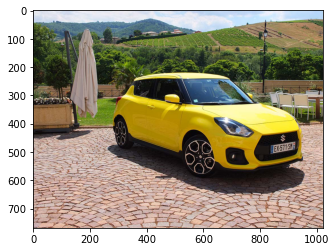

In [3]:
from skimage import io
import matplotlib.pyplot as plt

image_originale = 'car.jpg'
img_orig = io.imread(image_originale)
plt.imshow(img_orig)         # Affichage l'image "car" originale
plt.show() 

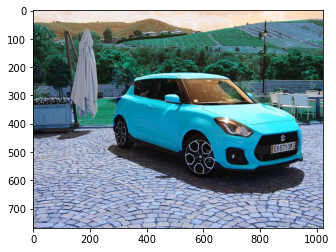

In [4]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt


#imageorig = cv2.imread('car.jpg')

image = cv2.imread('car.jpg')

(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 3)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)#changer image

cv2.imwrite('car3.jpg', quant)
plt.imshow(image)

cv2.imread('car.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

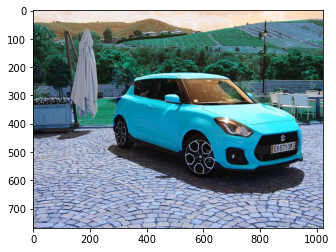

In [5]:
plt.imshow(image)

In [4]:
!pip install opencv-python

## <span style="color: #7A0C9F">I.1. Display the image after clustering</span>

### <span style="color: #390202"> we can choose the image that we applied the clustering

In [4]:
#we have here in our directory 10 images you can use 2 to 10 (2 ---> 2 clusters)  ((10 ---> 10 clusters))
  
# Read RGB image 
affiche_image = cv2.imread('car3.jpg') 

# Output img with window name as 'affiche_image' 

cv2.imshow('image_after_clustering', affiche_image)  

    
# Maintain output window utill 
# user presses a key 
cv2.waitKey(0)         
  
# Destroying present windows on screen 
cv2.destroyAllWindows()  

![alternate text](car3.jpg)


## <span style="color: #7A0C9F">I.2. image segmentation with opencv (2nd method) </span>

In [6]:
import cv2 as cv
import numpy as np


# Load original image
originalImage = cv.imread("car.jpg")
originalImage = cv.cvtColor(originalImage, cv.COLOR_BGR2RGB)
reshapedImage = np.float32(originalImage.reshape(-1, 3))
numberOfClusters = 2

stopCriteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.1)
ret, labels, clusters = cv.kmeans(reshapedImage, numberOfClusters, None, stopCriteria, 10, cv.KMEANS_RANDOM_CENTERS)

clusters = np.uint8(clusters)

intermediateImage = clusters[labels.flatten()]
clusteredImage = intermediateImage.reshape((originalImage.shape))

cv.imwrite("clusteredImage.jpg", clusteredImage)


True

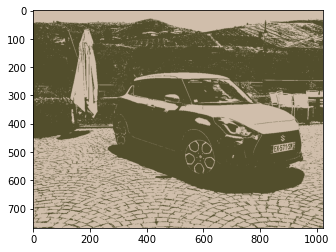

In [6]:
plt.imshow(clusteredImage)

## <span style="color: #7A0C9F">I.3. Remove i cluster </span>

In [8]:
# Remove 1 cluster from image and apply canny edge detection
removedCluster = 1

cannyImage = np.copy(originalImage).reshape((-1, 3))
cannyImage[labels.flatten() == removedCluster] = [0, 0, 0]

cannyImage = cv.Canny(cannyImage,100,200).reshape(originalImage.shape)
cv.imwrite("cannyImage.jpg", cannyImage)


True

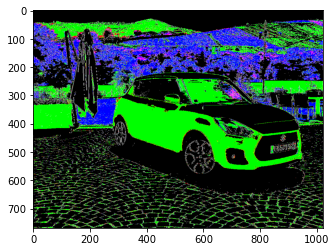

In [8]:
plt.imshow(cannyImage)

## <span style="color: #7A0C9F">I.3. Finding contours using opencv


In [9]:
initialContoursImage = np.copy(cannyImage)
imgray = cv.cvtColor(initialContoursImage, cv.COLOR_BGR2GRAY)
_, thresh = cv.threshold(imgray, 50, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(initialContoursImage, contours, -1, (0,0,255), cv.CHAIN_APPROX_SIMPLE)
cv.imwrite("initialContoursImage.jpg", initialContoursImage)

True

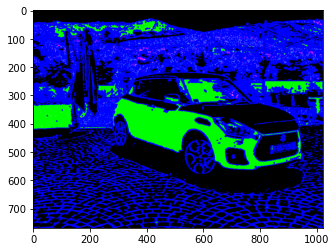

In [10]:
plt.imshow(initialContoursImage)

#### <span style="color: #390202"> We can there's a lot of red here, and we need to focus on our montain target! We need to ignore all these small contours and focus on the biggest ones. By looking at the image, I'd say we need to extract the biggest contour and that's our montain.

#### <span style="color: #390202">Well, not really..if you look closely, the image above has a red border (look at the saved image). That's right, the findContours method also finds the contour of the entire image.

#### <span style="color: #390202">So what we want to do is try to find the second biggest contour in the image and hope that the montain and all around.</span>

In [10]:
cnt = contours[0]
largest_area=0
index = 0
for contour in contours:
    if index > 0:
        area = cv.contourArea(contour)
        if (area>largest_area):
            largest_area=area
            cnt = contours[index]
    index = index + 1

biggestContourImage = np.copy(originalImage)
cv.drawContours(biggestContourImage, [cnt], -1, (0,0,255), 3)
cv.imwrite("biggestContourImage.jpg", biggestContourImage)

True

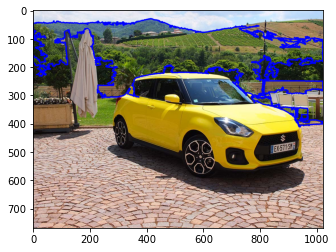

In [12]:
plt.imshow(biggestContourImage)

# <span style="color: #110C9F">II. Add different noise to an image 

#### <span style="color: #390202"> At this section, we will discuss how we can add different types of noise in an image like Gaussian, salt-and-pepper, speckle, etc. By knowing this, you will be able to evaluate various image filtering, restoration, and many other techniques. So, let’s get started.

#### <span style="color: #390202"> Image noise is a random variation in the intensity values. Thus, by randomly inserting some values in an image, we can reproduce any noise pattern. For randomly inserting values, Numpy random module comes handy. Let’s see how

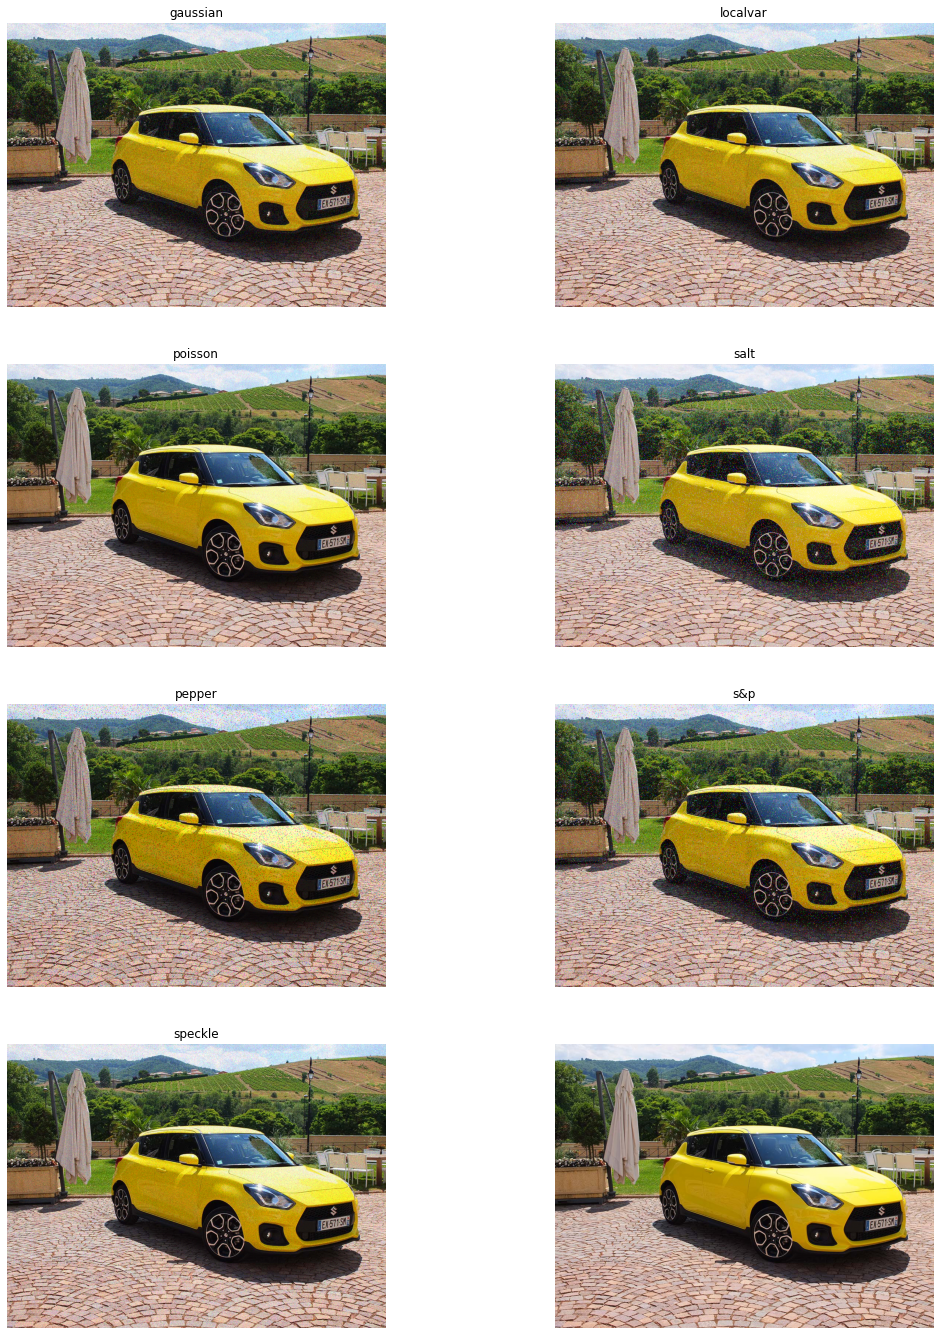

In [11]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt

img_path="car.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()


#### Image noise is a random variation in the intensity values. Thus, by randomly inserting some values in an image, we can reproduce any noise pattern. For randomly inserting values, Numpy random module comes handy.

#### I can add several builtin noise patterns, such as Gaussian, salt and pepper, Poisson, speckle, etc

### <span style="color: #258afd"> Using Interact


The interact function (ipywidgets.interact) automatically creates user interface (UI) controls for exploring code and data interactively like in our exmple  choose between ["Gaussian","Localvar","Poisson","Salt"] 

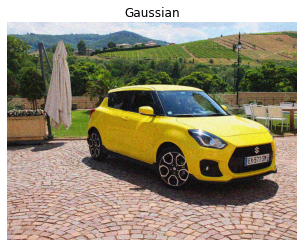

In [12]:
import skimage.io
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
img_path="car.jpg"
img = skimage.io.imread(img_path)/255.0

 

def plotnoise(mode):
    img_path="car.jpg"
    img = skimage.io.imread(img_path)/255.0
    #plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")
    

 
plt.figure(figsize=(18,24))
r=4
c=2
interact(plotnoise,mode=["Gaussian","Localvar","Poisson","Salt"]);

 
plt.show()

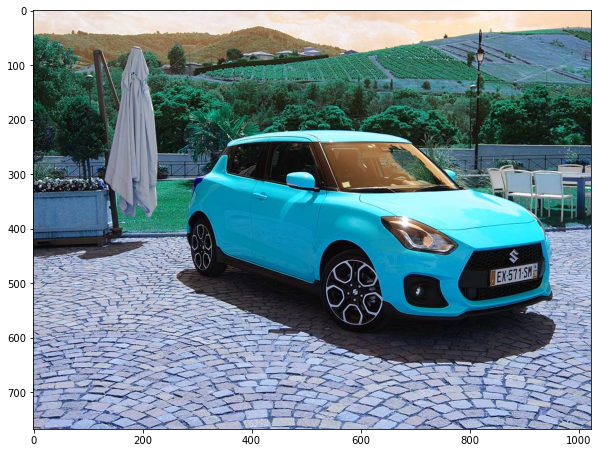

In [13]:
def segm(k):
    image = cv2.imread('car.jpg')
    (h1, w1) = image.shape[:2]

 

    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

 

    image = image.reshape((image.shape[0] * image.shape[1], 3))

 


    clt = KMeans(n_clusters = k)

 

    labels = clt.fit_predict(image)
    quant = clt.cluster_centers_.astype("uint8")[labels]

 

#reshape the feature vectors to images
    quant = quant.reshape((h1, w1, 3))
    image = image.reshape((h1, w1, 3))

 

#convert from L*a*b* to RGB
    quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
    image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

 

    plt.figure(figsize=(10,11))
    cv2.imwrite('car_interact.jpg', quant)
    return plt.imshow(image)
plt.show()
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
interact(segm,k=widgets.IntSlider(min=2, max=4, step=1, value=2));

## <span style="color: #7A0C9F"> II.1. Gaussian Noise


In [14]:

import cv2
import numpy as np
 
img = cv2.imread('car.jpg')
# Generate Gaussian noise
gauss = np.random.normal(0,1,img.size)
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
# Add the Gaussian noise to the image
img_gauss = cv2.add(img,gauss)
# Display the image
cv2.imshow('Gaussian_noise',img_gauss)
cv2.waitKey(0)
cv.imwrite("Gaussian_Noise.jpg", img_gauss)


True

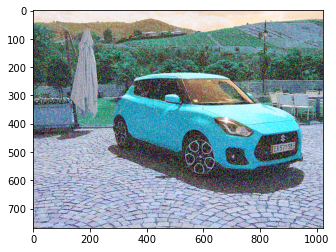

In [15]:
plt.imshow(img_gauss)

![alternate text](Gaussian_Noise.jpg)


## <span style="color: #7A0C9F"> II.2. Speckle Noise


In [15]:

import cv2
import numpy as np
 
img = cv2.imread('car.jpg')
 
gauss = np.random.normal(0,1,img.size)
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
noise = img + img * gauss
 
cv2.imshow('speckle Noise',noise)
cv2.waitKey(0)
cv.imwrite("Speckle_Noise.jpg", gauss)


True

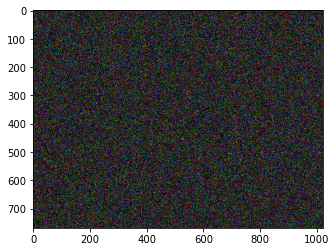

In [17]:
plt.imshow(gauss)

![alternate text](Speckle_Noise.jpg)


# <span style="color: #110C9F">III. Eliminate noise from the image (Gaussian_Noise.jpg)

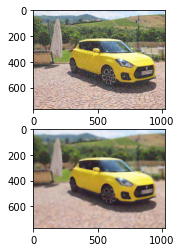

True

In [16]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('Gaussian_Noise.jpg')
b,g,r = cv2.split(img)           # get b,g,r
rgb_img = cv2.merge([r,g,b])     # switch it to rgb

# Denoising
dst = cv2.fastNlMeansDenoisingColored(img,None,50,10,7,21)

b,g,r = cv2.split(dst)           # get b,g,r
rgb_dst = cv2.merge([r,g,b])     # switch it to rgb

plt.subplot(211),plt.imshow(rgb_img)
plt.subplot(212),plt.imshow(rgb_dst)
plt.show()
cv.imwrite("denoised_image1.jpg", dst) 

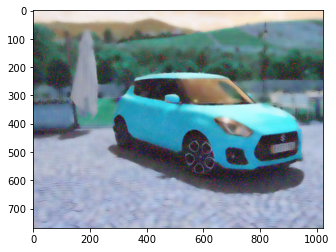

In [19]:
plt.imshow(dst)

### ---->> by comparing the Gaussian_Noise.jpg and the denoised_image1.jpg
### <span style="color: #011802"> As a result there is some noises are removed from the noised one !!

![alternate text](Gaussian_Noise.jpg)

![alternate text](denoised_image1.jpg)

In [3]:
pip list

Package                            VersionNote: you may need to restart the kernel to use updated packages.
---------------------------------- -------------------
alabaster                          0.7.12
altair                             4.1.0
anaconda-client                    1.7.2
anaconda-navigator                 1.9.12
anaconda-project                   0.8.3
argh                               0.26.2
asn1crypto                         1.3.0
astroid                            2.4.2

astropy                            4.0.1.post1
atomicwrites                       1.4.0
attrs                              19.3.0
autopep8                           1.5.3
Babel                              2.8.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
bcrypt                             3.1.7
beautifulsoup4                     4.9.1
bita

In [5]:

%load_ext watermark
# python, ipython, packages, and machine charateristics
%watermark -v -m -p wget,pandas,numpy,geopy,altair,vega,vega_datasets,watermark
# date
print(" ")
%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.8.3
IPython 7.16.1

wget not installed
pandas 1.0.5
numpy 1.18.5
geopy 2.0.0
altair 4.1.0
vega 3.4.0
vega_datasets 0.8.0
watermark 2.0.2

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
CPU cores  : 8
interpreter: 64bit
 
last updated: Fri Nov 06 2020 23:18:35 Maroc
